**Data Gathering**

**Sources of Data** <br>
A vast amount of historical data can be found in files such as:
- MS Word documents
- Emails
- Spreadsheets
- MS PowerPoints
- PDFs
- HTML
- and plaintext files <br>
Public and Private Archives <br>
CSV, JSON, and XML files use plaintext, a common format, and are compatible with a wide range of applications <br>
The Web can be mined for data using a web scraping application <br>
The IoT uses sensors create data <br>
Sensors in smartphones, cars, airplanes, street lamps, and home appliances capture raw data

**Open Data and Private Data**
1. Open Data <br>
The Open Knowledge Foundation describes Open Data as “any content, information or data that people are free to use, reuse, and redistribute without any legal, technological, or social restriction.”
2. Private Data <br>
Data related to an expectation of privacy and regulated by a particular country/government

**Structured and Unstructured Data**
1. Structured Data <br>
Data entered and maintained in fixed fields within a file or record Easily entered, classified, queried, and analyzed Relational databases or spreadsheets
2. Unstructured Data Lacks organization <br>
Raw data Photo contents, audio, video, web pages, blogs, books, journals, white papers, PowerPoint presentations, articles, email, wikis, word processing documents, and text in general

**Example of gathering image data using webcam** <br>
Note: Run this snippet using local jupyter notebook

In [6]:
!pip install opencv-python

In [ ]:
import cv2
key = cv2. waitKey(1)
webcam = cv2.VideoCapture(0)
while True:
    try:
        check, frame = webcam.read()
        print(check) #prints true as long as the webcam is running
        print(frame) #prints matrix values of each framecd
        cv2.imshow("Capturing", frame)
        key = cv2.waitKey(1)
        if key == ord('s'):
            cv2.imwrite(filename='saved_img.jpg', img=frame)
            webcam.release()
            img_new = cv2.imread('saved_img.jpg', cv2.IMREAD_GRAYSCALE)
            img_new = cv2.imshow("Captured Image", img_new)
            cv2.waitKey(1650)
            cv2.destroyAllWindows()
            print("Processing image...")
            img_ = cv2.imread('saved_img.jpg', cv2.IMREAD_ANYCOLOR)
            print("Converting RGB image to grayscale...")
            gray = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
            print("Converted RGB image to grayscale...")
            print("Resizing image to 28x28 scale...")
            img_ = cv2.resize(gray,(28,28))
            print("Resized...")
            img_resized = cv2.imwrite(filename='saved_img-final.jpg', img=img_)
            print("Image saved!")
            break
        elif key == ord('q'):
            print("Turning off camera.")
            webcam.release()
            print("Camera off.")
            print("Program ended.")
            cv2.destroyAllWindows()
            break
    except(KeyboardInterrupt):
        print("Turning off camera.")
        webcam.release()
        print("Camera off.")
        print("Program ended.")
        cv2.destroyAllWindows()
        break

**Example of gathering voice data using microphone** <br>
Note: Run the snippet of codes using local jupyter notebook

In [9]:
!pip3 install sounddevice

In [10]:
!pip3 install wavio

In [11]:
!pip3 install scipy

In [12]:
# "!apt-get install libportaudio2" <- This code is for linux only

# Do the following in the anaconda prompt (download the modules):
# pip install pipwin
# pip install pyaudio
# pip install sounddevice
# pip install wavio

In [13]:
# import required libraries
import pyaudio
import sounddevice as sd
from scipy.io.wavfile import write
import wavio as wv

# Sampling frequency
freq = 44100

# Recording duration
duration = 5

# Start recorder with the given values
# of duration and sample frequency
recording = sd.rec(int(duration * freq),
 samplerate=freq, channels=1) # I changed the channels to 1, I only have one input audio device

# Record audio for the given number of seconds
sd.wait()

# This will convert the NumPy array to an audio
# file with the given sampling frequency
write("recording0.wav", freq, recording)

# Convert the NumPy array to audio file
wv.write("recording1.wav", recording, freq, sampwidth=2)

In [14]:
from IPython.display import Audio # To output the recorded audio

# Play the recorded audio
Audio("recording0.wav")

**Web Scraping** <br>
**Web scraping, web harvesting, or web data extraction** is data scraping used for extracting data from websites. The web scraping software may directly access the World Wide Web using the Hypertext Transfer Protocol or a web browser. While web scraping can be done manually by a software user, the term typically refers to automated processes implemented using a bot or web crawler. It is a form of copying in which specific data is gathered and copied from the web, typically into a central local database or spreadsheet, for later retrieval or analysis. <br>

Reference: https://en.wikipedia.org/wiki/Web_scraping

**Image Scraping using BeautifulSoup and Request**

In [17]:
!pip install bs4

In [18]:
!pip install requests

In [19]:
import requests
from bs4 import BeautifulSoup

def getdata(url):
    r = requests.get(url)
    return r.text
    
htmldata = getdata("https://www.google.com/")
soup = BeautifulSoup(htmldata, 'html.parser')
for item in soup.find_all('img'):
    print(item['src'])

/images/branding/googlelogo/1x/googlelogo_white_background_color_272x92dp.png


In [20]:
!pip install selenium

**Image Scraping using Selenium** <br>
Note: Run the snippet of code using local jupyter notebook

In [22]:
!pip install selenium
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import requests
import shutil
import os
import getpass
import urllib.request
import io
import time
from PIL import Image
user = getpass.getuser()
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome()
def scroll_to_end(driver):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(5) # sleep_between_interactions

def getImageUrls(name,totalImgs,driver):
    search_url = "https://www.google.com/search?q=cat&tbm=isch&ved=2ahUKEwjNn_Gn7YyFAxU3yDgGHQYQCesQ2-cCegQIABAA&oq=cat&gs_lp=EgNpbWciA2NhdDINEAAYgAQYigUYQxixAzIIEAAYgAQYsQMyDhAAGIAEGIoFGLEDGIMBMggQABiABBixAzILEAAYgAQYsQMYgwEyCBAAGIAEGLEDMggQABiABBixAzIFEAAYgAQyCBAAGIAEGLEDMggQABiABBixA0iqGVCADlilF3AAeACQAQCYAVegAc0CqgEBNLgBA8gBAPgBAYoCC2d3cy13aXotaW1nwgIKEAAYgAQYigUYQ4gGAQ&sclient=img&ei=WBYAZs2TMLeQ4-EPhqCk2A4&bih=568&biw=1251&hl=en"
    driver.get(search_url)
    img_urls = set()
    img_count = 0
    results_start = 0
    
    while(img_count+results_start<totalImgs): # Extract actual images now
        scroll_to_end(driver)
        totalResults = driver.find_elements(By.CLASS_NAME,"Q4LuWd")       
        print('total results:', len(totalResults))
        print(f"Found: {totalResults} search results. Extracting links from{results_start}:{totalResults}")
        for img in totalResults[results_start:totalImgs]:
            img.click()
            time.sleep(5)
            image = driver.find_element(By.CLASS_NAME,'iPVvYb')
            img_urls.add(image.get_attribute('src'))
            print(img_urls)
            img_count=len(img_urls)
            print(img_count)           
    return img_urls

def downloadImages(folder_path,file_name,url):
    try:
        image_content = requests.get(url).content
    except Exception as e:
        print(f"ERROR - COULD NOT DOWNLOAD {url} - {e}")
    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SAVED - {url} - AT: {file_path}")
    except Exception as e:
        print(f"ERROR - COULD NOT SAVE {url} - {e}")
        
def saveInDestFolder(searchNames,destDir,totalImgs,driver):
    for name in list(searchNames):
        path=os.path.join(destDir,name)
        if not os.path.isdir(path):
            os.mkdir(path)
        print('Current Path',path)
        totalLinks=getImageUrls(name,totalImgs,driver)
        print('totalLinks',totalLinks)
        
    if totalLinks is None:
        print('images not found for :',name)
        
    else:
        for i, link in enumerate(totalLinks):
            file_name = f"{i:150}.jpg"
            downloadImages(path,file_name,link)
            
searchNames=['cat']
destDir=f'C:\Users\Eleazar\Downloads'
totalImgs=5

saveInDestFolder(searchNames,destDir,totalImgs,driver)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (952092033.py, line 81)

**Web Scraping of Movies Information using BeautifulSoup** <br>
We want to analyze the distributions of IMDB and Metacritic movie ratings to see if we find anything interesting. To do this, weʼll first scrape data for over 2000 movies.

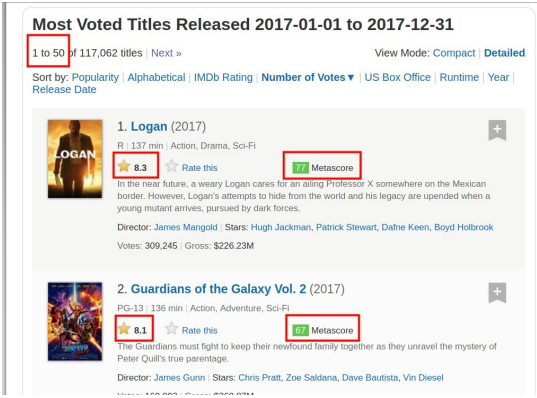

**Identifying the URL structure** <br>
In the image above, you can see that the URL has several parameters after the question mark:
- release_date — Shows only the movies released in a specific year.
- sort — Sorts the movies on the page. sort=num_votes,desc translates to sort by number of votes in a descending order.
- page — Specifies the page number.
- ref_ — Takes us to the the next or the previous page. The reference is the page we are currently on. adv_nxt and adv_prv are two possible values. They translate to advance to the next page, and advance to the previous page, respectivel


In [23]:
from requests import get
url = 'https://www.imdb.com/search/title/?release_date=2017-01-01,2017-12-31&sort=num_votes,desc'
agent = {"User-Agent": 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36'}
response = get(url, headers = agent)
print(response)
print(response.text[:500])

<Response [200]>
<!DOCTYPE html><html lang="en-US" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://www.facebook.com/2008/fbml"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><script>window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
             


**Understanding the HTML structure of a single page**

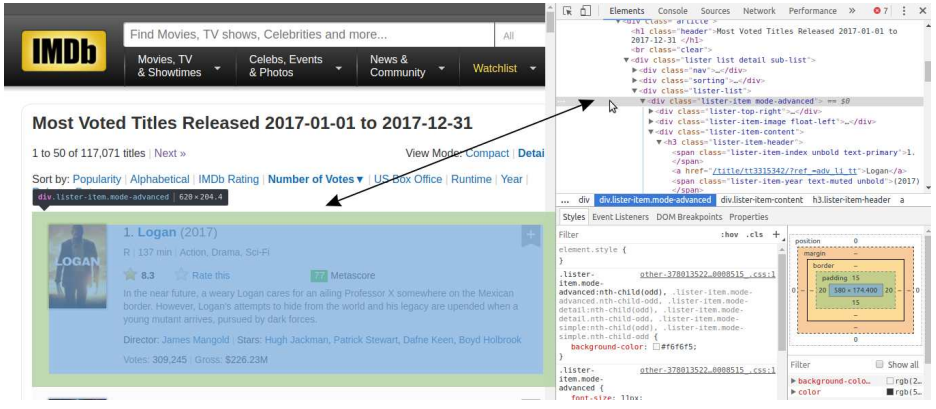

**Using BeautifulSoup to parse the HTML content** <br>
To parse our HTML document and extract the 50 div containers, weʼll use a Python module called BeautifulSoup, the most common web scraping module for Python. <br>
In the following code cell we will:
- Import the BeautifulSoup class creator from the package bs4.
- Parse response.text by creating a BeautifulSoup object, and assign this object to html_soup. The 'html.parser' argument indicates that we want to do the parsing using Pythonʼs built-in HTML parser.

In [25]:
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')
headers = {'Accept-Language': 'en-US,en;q=0.8'}
type(html_soup)

bs4.BeautifulSoup

Before extracting the 50 div containers, we need to figure out what distinguishes them from other div elements on that page. Often, the distinctive mark resides in the class attribute. If you inspect the HTML lines of the containers of interest, youʼll notice that the class attribute has two values: lister-item and mode-advanced. This combination is unique to these div containers. We can see thatʼs true by doing a quick search (Ctrl + F). We have 50 such containers, so we expect to see only 50 matches:


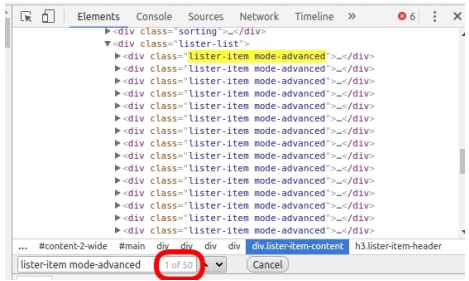

Now letʼs use the find_all() method to extract all the div containers that have a class attribute of lister-item mode-advanced:

In [27]:
movie_containers = html_soup.find_all('li', class_ = 'ipc-metadata-list-summary-item')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
25


find_all() returned a ResultSet object which is a list containing all the 50 divs we are interested in.

Now weʼll select only the first container, and extract, by turn, each item of interest:
- The name of the movie.
- The year of release.
- The IMDB rating.
- The Metascore.
- The number of votes.

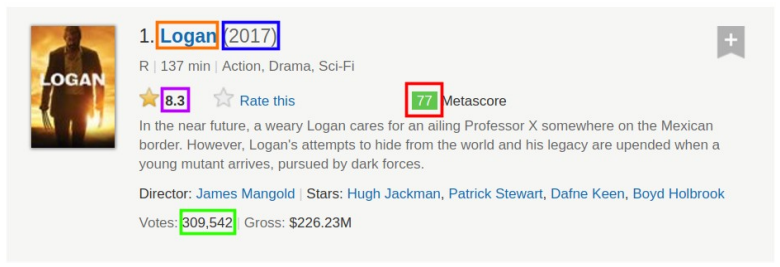

**Extracting the data for a single movie** <br>
We can access the first container, which contains information about a single movie, by using list notation on movie_containers.

In [29]:
first_movie = movie_containers[0]
first_movie

<li class="ipc-metadata-list-summary-item"><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span aria-disabled="false" class="ipc-metadata-list-summary-item__t ipc-btn--not-interactable"></span><div class="sc-1c782bdc-1 jeRnfh dli-parent"><div class="sc-1c782bdc-0 kZFQUh"><div class="sc-ee514ad1-0 kYZRWL dli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--media-radius ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div aria-label="add to watchlist" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--loading ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" data-testid="poster-watchlist-ribbon-add" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" height="34px" role="presentation" viewbox="0 0 24 34" width="24px" xmlns="http://www.w3.org/2000/svg"><polygon class="ipc-watchlist-ribbon__bg-ribbon" 

The name of the movie

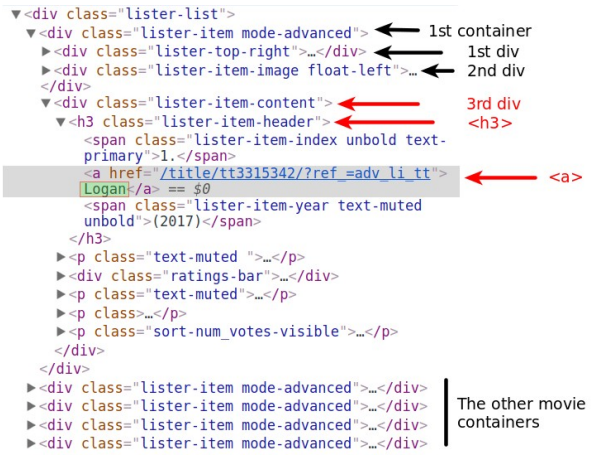

In [31]:
first_name = first_movie.h3.text
first_name[3:]

'Logan'

The year of the movieʼs release

In [34]:
first_year = movie_containers[0].find('span', class_ = "sc-2bbfc9e9-7 jttFlJ dli-title-metadata-item")
print(first_year)

<span class="sc-2bbfc9e9-7 jttFlJ dli-title-metadata-item">2017</span>


In [36]:
first_year = first_year.text
first_year

'2017'

The IMDB rating

In [39]:
first_imdb = movie_containers[0].find('span', class_ = "ipc-rating-star--rating")
first_imdb.text[:3]

'8.1'

The Metascore

In [42]:
first_mscore = movie_containers[0].find('span', class_ = 'sc-b0901df4-0 bXIOoL metacritic-score-box')
first_mscore = first_mscore.text
print(first_mscore)

77


 The number of votes

In [45]:
first_votes = movie_containers[0].find('span', class_ = 'ipc-rating-star--voteCount')
first_votes.text[2:-1]

'886K'

The script


In [48]:
# Initialize empty lists to store extracted movie details
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

# Loop through each movie container to gather relevant data
for container in movie_containers:
    # Get the movie title, skipping the ranking number
    title = container.find('h3', class_="ipc-title__text").text[3:]
    names.append(title)
    
    # Extract the release year
    year = container.find('span', class_="sc-2bbfc9e9-7 jttFlJ dli-title-metadata-item").text
    years.append(year)
    
    # Extract IMDb rating
    rating = container.find('span', class_="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating").text[:3]
    imdb_ratings.append(rating)
    
    # Extract the Metascore
    score = container.find('span', class_='sc-b0901df4-0 bcQdDJ metacritic-score-box')
    metascores.append(score.text if score else 0)
    
    # Get the number of votes, trimming extra characters
    vote_count = container.find('span', class_='ipc-rating-star--voteCount').text[2:-1]
    votes.append(vote_count)

print(len(names))
print(len(years))
print(len(imdb_ratings))
print(len(metascores))
print(len(votes))

25
25
25
25
25


In [50]:
import pandas as pd
test_df = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})
print(test_df.info())
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   movie      25 non-null     object
 1   year       25 non-null     object
 2   imdb       25 non-null     object
 3   metascore  25 non-null     int64 
 4   votes      25 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.1+ KB
None


,movie,year,imdb,metascore,votes
0,Logan,2017,8.1,0,886K
1,Thor: Ragnarok,2017,7.9,0,851K
2,Guardians of the Galaxy Vol. 2,2017,7.6,0,791K
3,Dunkirk,2017,7.8,0,770K
4,Get Out,2017,7.8,0,755K
5,Spider-Man: Homecoming,2017,7.4,0,754K
6,Wonder Woman,2017,7.3,0,718K
7,Blade Runner 2049,2017,8.0,0,710K
8,Star Wars: Episode VIII - The Last Jedi,2017,6.9,0,693K
9,Baby Driver,2017,7.5,0,647K


The script for multiple pages


In [94]:
from time import time
from time import sleep
from requests import get
from random import randint
from IPython.core.display import clear_output
from bs4 import BeautifulSoup

from IPython.core.display import clear_output
pages = ['1','2','3','4','5']
years_url = ['2017', '2018', '2019', '2020']

# Redeclaring the lists to store data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

# Preparing the monitoring of the loop
start_time = time()
requests = 0

# For every year in the interval 2000-2017
for year_url in years_url:
    
    # For every page in the interval 1-4
    for page in pages:
        
        # Make a get request
        url = f'https://www.imdb.com/search/title/?release_date={year_url}-01-01,{year_url}-12-31&sort=num_votes,desc'
        agent = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36"}
        response = get(url,headers = agent)
        print(response.text[:500])
        #response = get('https://www.imdb.com/search/title?release_date=' + year_url +
        #'&sort=num_votes,desc&page=' + page, headers = headers)
        
        # Pause the loop
        sleep(5)
        
        # Monitor the requests
        requests += 1
        elapsed_time = time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
        clear_output(wait = True)
        
        # Throw a warning for non-200 status codes
        if response.status_code != 200:
            print('Request: {}; Status code: {}'.format(requests, response.status_code))
            
        # Break the loop if the number of requests is greater than expected
        if requests > 25:
            print('Number of requests was greater than expected.')
            break
        # Parse the content of the request with BeautifulSoup
        page_html = BeautifulSoup(response.text, 'html.parser')
        
        # Select all the 25 movie containers from a single page
        mv_containers = page_html.find_all('div', class_ = 'sc-ab6fa25a-3 bVYfLY dli-parent')
        
        # For every movie of these 25
        for container in mv_containers:
            # If the movie has a Metascore, then:
            if container.find('span', class_ = 'sc-b0901df4-0 bcQdDJ metacritic-score-box') is not None:
                # Scrape the name
                name = container.find('h3',class_='ipc-title__text').text[3:]
                names.append(name)
                
                # Scrape the year
                year = container.find('span', class_ = 'sc-b0691f29-8 ilsLEX dli-title-metadata-item').text
                years.append(year)
                
                # Scrape the IMDB rating
                imdb = container.find('span', class_ = 'ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating').text[:3]
                imdb_ratings.append(imdb)
                
                # Scrape the Metascore
                m_score = container.find('span', class_ = 'sc-b0901df4-0 bcQdDJ metacritic-score-box').text
                metascores.append(m_score)
                
                # Scrape the number of votes
                vote = container.find('span', class_ = 'ipc-rating-star--voteCount').text[2:-1]
                votes.append(vote)

<!DOCTYPE html><html lang="en-US" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://www.facebook.com/2008/fbml"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><script>window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
             
Request:20; Frequency: 0.14956094563676797 requests/s


In [56]:
movie_ratings = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})
print(movie_ratings.info())
movie_ratings.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movie      0 non-null      float64
 1   year       0 non-null      float64
 2   imdb       0 non-null      float64
 3   metascore  0 non-null      float64
 4   votes      0 non-null      float64
dtypes: float64(5)
memory usage: 132.0 bytes
None


,movie,year,imdb,metascore,votes


In [58]:
movie_ratings.tail(10)

,movie,year,imdb,metascore,votes


In [60]:
movie_ratings.to_csv('/content/drive/My Drive/Colab Notebooks/Dataset/movie_ratings.csv')

OSError: Cannot save file into a non-existent directory: '\content\drive\My Drive\Colab Notebooks\Dataset'

**Data Preparation** <br>
- Collected data may not be compatible or formatted correctly
- Data must be prepared before it can be added to a data set
- Extract, Transform and Load (ETL), the process for collecting data from a variety of sources, transforming the data, and then loading the data into a database

**Data preprocessing** <br>
Data Processing is a process of cleaning the raw data i.e. the data is collected in the real world and is converted to a clean data set. In other words, whenever the data is gathered from different sources it is collected in a raw format and this data isnʼt feasible for the analysis. Therefore, certain steps are executed to convert the data into a small clean data set, this part of the process is called as data preprocessing.

Most of the real-world data is messy, some of these types of data are:
1. Missing data: Missing data can be found when it is not continuously created or due to technical issues in the application (IOT system).
2. Noisy Data This type of data is also called outliners, this can occur due to human errors (human manually gathering the data) or some technical problem of the device at the time of collection of data.
3. Inconsistent data: This type of data might be collected due to human errors (mistakes with the name or values) or duplication of data.

These are some of the basic pre processing techniques that can be used to convert raw data.
1. Conversion of data: As we know that Machine Learning models can only handle numeric features, hence categorical and ordinal data must be somehow converted into numeric features.
2. Ignoring the missing values: Whenever we encounter missing data in the data set then we can remove the row or column of data depending on our need. This method is known to be efficient but it shouldnʼt be performed if there are a lot of missing values in the dataset.
3. Filling the missing values: Whenever we encounter missing data in the data set then we can fill the missing data manually, most commonly the mean, median or highest frequency value is used.
4. Machine learning: If we have some missing data then we can predict what data shall be present at the empty position by using the existing data.
5. Outliers detection: There are some error data that might be present in our data set that deviates drastically from other observations in a data set. [Example: human weight = 800
Kg; due to mistyping of extra 0]

**Example of Data Preparation of movie_rating.csv**

In [ ]:
movie_ratings['year'].unique()

In [ ]:
movie_ratings.dtypes

In [ ]:
movie_ratings['year'] = (movie_ratings.year.apply(lambda x:x.replace('(I)','')))

In [ ]:
movie_ratings['year'].unique()

In [66]:
movie_ratings['year'] = (movie_ratings.year.apply(lambda x:x.replace('(II)','')))

In [68]:
movie_ratings['year'] = (movie_ratings.year.apply(lambda x:x.replace('(III)','')))

In [70]:
movie_ratings['year'].unique()

array([], dtype=float64)

In [72]:
movie_ratings['year'] = (movie_ratings.year.apply(lambda x:x.replace('(','')))

In [74]:
movie_ratings['year'].unique()

array([], dtype=float64)

In [76]:
movie_ratings['year'] = (movie_ratings.year.apply(lambda x:x.replace(')','')))

In [78]:
movie_ratings['year'].unique()

array([], dtype=float64)

In [80]:
movie_ratings['year'] = movie_ratings['year'].astype(int)

In [82]:
movie_ratings['year'].unique()

array([], dtype=int32)

In [84]:
movie_ratings.dtypes

movie        float64
year           int32
imdb         float64
metascore    float64
votes        float64
dtype: object

In [86]:
movie_ratings.head(10)

,movie,year,imdb,metascore,votes


In [88]:
movie_ratings.tail(10)

,movie,year,imdb,metascore,votes


In [90]:
movie_ratings

,movie,year,imdb,metascore,votes
